# Project 2

## GENERAL INSTRUCTIONS:

**this is NOT a group project**
- **CLEARLY** mark where you are answering each question (all written questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---


# DONUTS

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv),

- **a)** make 3 scatterplots using ggplot to show:
    - `Sodium_100g` vs `Total_Fat_100g`
    - `Sodium_100g` vs. `Sugar_100g`
    - `Sugar_100g` vs `Total_Fat_100g`
    
    You will be graded on the effectiveness of the graphs as well as their content.
    
    
- **b)** Using the scatterplots from part **a** as well as the donuts dataset, **thouroughly discuss which clustering method** (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) **you think would be best for this data and WHY**. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (**mention each of the 4 algorithms at least once**) and how they apply to this specific dataset. (*IN A MARKDOWN CELL*)
    - you should be making statements that both 1) discuss characteristics of the algorithm and 2) specifically discuss how that characteristic applies (or doesn't) to this dataset.

Please note that for this assignment, "It's easier to code" does not count as a valid reason. The reasons should be based on the algorithms/data.


(You must use "\*\*" to make any mention of one of the algorithms bold in your discussion. For example "I think \*\*DBSCAN\*\* is the best algorithm ever!" will make the word "**DBSCAN**" bold in a Markdown cell).

- **c)** **Implement the TWO algorithms** you think will work BEST (1 algo) and WORST (1 algo) here using all 3 variables `Sodium_100g`, `Total_Fat_100g` and `Sugar_100g`, and describe **how you chose any hyperparameters** (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. (*IN A MARKDOWN CELL*)



- **d)** **Thouroughly discuss the performance** of your clustering models. For each algorithm (best and worst): 
    - which metric did you use to asses your model? (*IN A MARKDOWN CELL*)
    - how did your model perform? (*IN A MARKDOWN CELL*)
    - remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (*IN A MARKDOWN CELL*)



- **e)** Choose ONE other of the `_100g` variables from the data set to **add to your clustering model** to improve it.
    - explain why you chose this variable. Either based on improvement in metrics, or outside knowledge you have about food/donuts (*IN A MARKDOWN CELL*)
    - make a new model, identical to the model you thought would be best in part c, but also including your new variable.
    - did this variable improve the fit of your clustering model? How can you tell? (*IN A MARKDOWN CELL*)
    
    
    
Note: The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

In [88]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

# make sure you have these to make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
#-----------------------------------------------------

%matplotlib inline


In [24]:
# a
donuts = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")
donuts.head()



,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


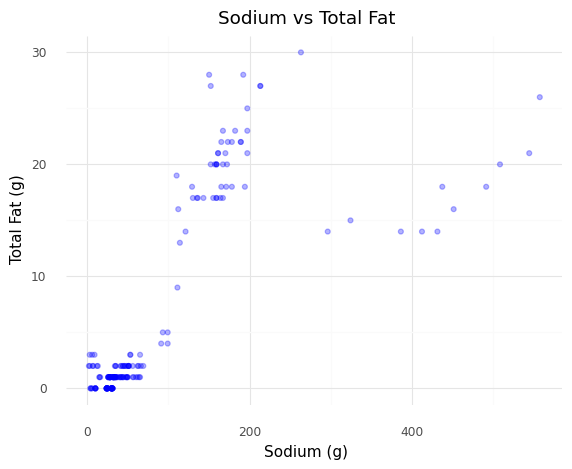

<ggplot: (8743940694053)>

In [19]:
(ggplot(donuts, aes(x = "Sodium_100g", y = "Total_Fat_100g")) + geom_point(color = "blue", alpha = 0.3) + theme_minimal() + xlab("Sodium (g)") + ylab("Total Fat (g)") + ggtitle("Sodium vs Total Fat"))

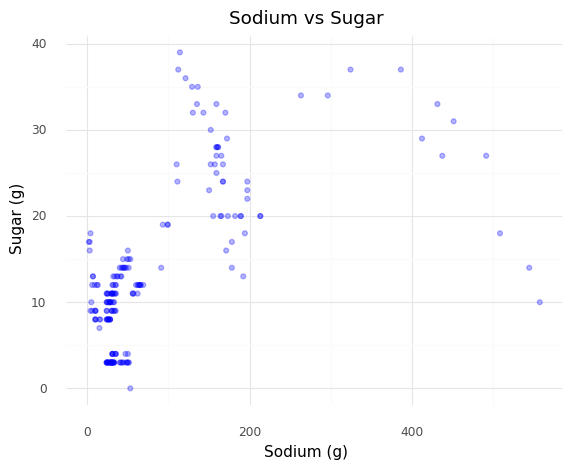

<ggplot: (8743940200001)>

In [21]:
(ggplot(donuts, aes(x = "Sodium_100g", y = "Sugar_100g")) + geom_point(color = "blue", alpha = 0.3) + theme_minimal() + xlab("Sodium (g)") + ylab("Sugar (g)") + ggtitle("Sodium vs Sugar"))

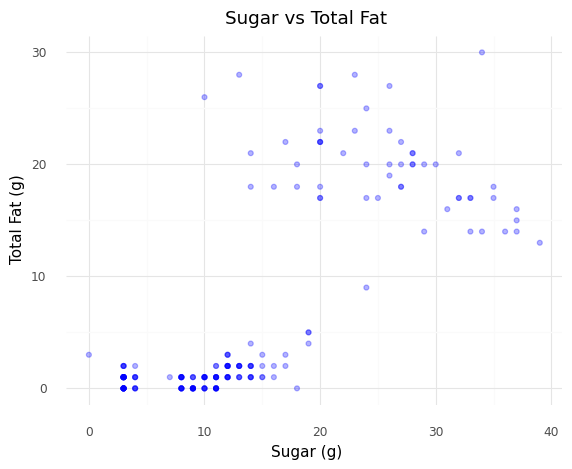

<ggplot: (8743940264401)>

In [22]:
(ggplot(donuts, aes(x = "Sugar_100g", y = "Total_Fat_100g")) + geom_point(color = "blue", alpha = 0.3) + theme_minimal() + xlab("Sugar (g)") + ylab("Total Fat (g)") + ggtitle("Sugar vs Total Fat"))

b) 

**KMeans** is not the ideal clustering algorithm to use for this dataset. KMeans has the assumption that the clusters are spherical. As shown in the graphs above, the clusters appear to be more oblong, not spherical. This violation of the assumption means that KMeans won't be effective to cluster this data set. There is also the assumption that each cluster has a similar number of data points. From the graphs shown above, it looks like the different clusters have varying densities, which will make KMeans less effective. Although it may not be extreme enough to impact the performance very much.

**EM** is a much better algorithm for clustering this data. The spherical assumption of KMeans is not present in this algorithm. The oblong structure of the clusters apparent in the graphs above is no problem for EM and it won't have difficulty clustering them. The soft assignment that this algorithm provides are pretty beneficial because two of the clusters seem relatively close together with a few data points in between them on the left side of the graphs above. This will be beneficial for clustering those "in between" data points.

**Hierarchical Clustering** is a decent algorithm for this data set. HAC is inefficient on data sets with high dimensionality. Since we are only using three predictors, the algorithm will have no trouble clustering. HAC is also very computationally expensive, however that won't have much of an impact on this data set since it is relatively small. One advantage this algorithm has is that is flexible in the number of clusters that it outputs. This could be useful for this data set because it may be tricky to decide whether there should be 2 or 3 clusters since two are close together.

**DBSCAN** will not be able to effectively cluster this data. It requires that all clusters in the data have similar density. This assumption is violated in this data set because the clusters appear to have largely varying densities in the graphs above. The violation of this assumption will make the clustering extremely difficult for this algorithm. There are also two clusters that are close together and slightly overlap on the left side of the graphs. This makes it extremely difficult for DBSCAN to differentiate between the two clusters and perform poorly.

In [83]:
# c
#BEST choice EM
features = ["Sodium_100g", "Total_Fat_100g", "Sugar_100g"]
X = donuts[features]

z = StandardScaler()

X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 3)

EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETTE: ", silhouette_score(X, cluster))

X["clusterEM"] = cluster

SILHOUETTE:  0.7406259709296275


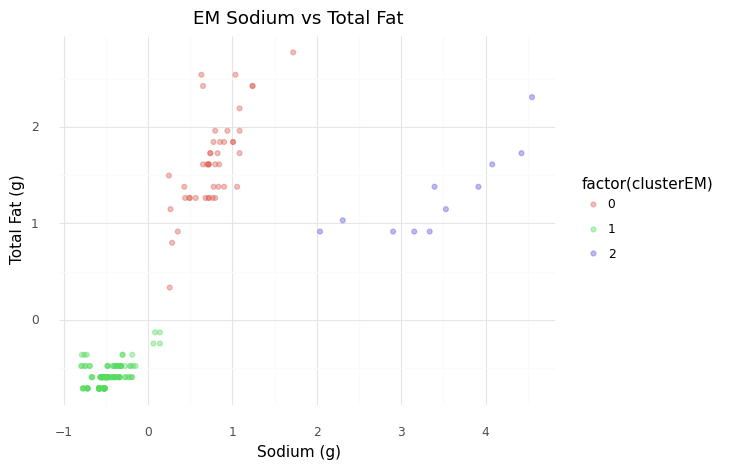

<ggplot: (8743939952577)>

In [101]:
(ggplot(X, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(clusterEM)")) + geom_point(alpha = 0.4) + theme_minimal() + xlab("Sodium (g)") + ylab("Total Fat (g)") + ggtitle("EM Sodium vs Total Fat"))

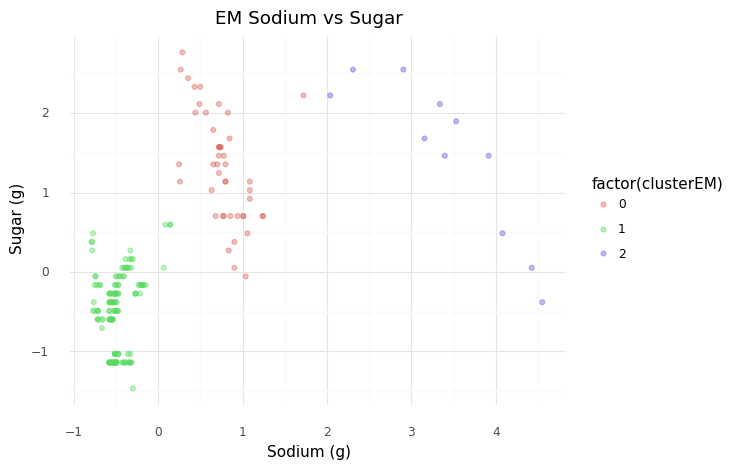

<ggplot: (8743940142693)>

In [102]:
(ggplot(X, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(clusterEM)")) + geom_point(alpha = 0.4) + theme_minimal() + xlab("Sodium (g)") + ylab("Sugar (g)") + ggtitle("EM Sodium vs Sugar"))

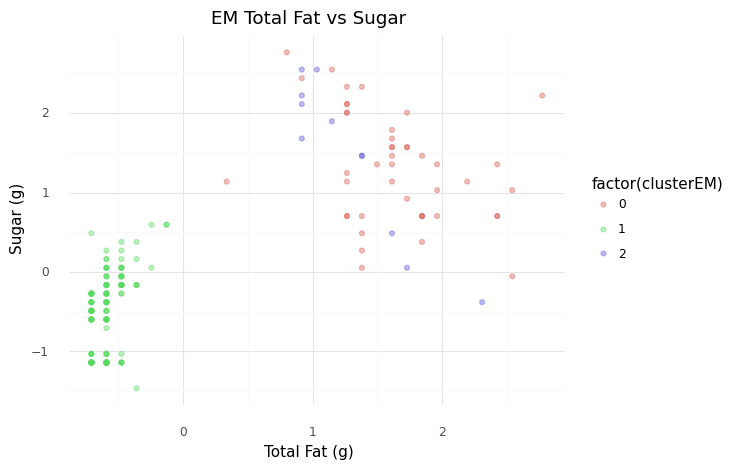

<ggplot: (8743940089193)>

In [103]:
(ggplot(X, aes(x = "Total_Fat_100g", y = "Sugar_100g", color = "factor(clusterEM)")) + geom_point(alpha = 0.4) + theme_minimal() + xlab("Total Fat (g)") + ylab("Sugar (g)") + ggtitle("EM Total Fat vs Sugar"))

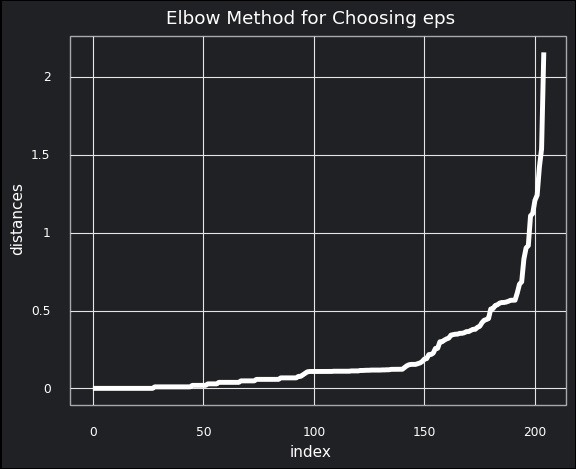

<ggplot: (8743939954265)>

In [91]:
#WORST DBSCAN
mins = 3
nn = NearestNeighbors(n_neighbors = mins + 1)

nn.fit(X)

distances, neighbors = nn.kneighbors(X)

distances = np.sort(distances[:, mins], axis = 0)

distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

In [107]:
db = DBSCAN(eps = 0.55, min_samples = 3).fit(X)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]

X["assignments"] = db.labels_

X_clustered = X.loc[(X.assignments >= 0)]


print(silhouette_score(X[["Sodium_100g","Total_Fat_100g", "Sugar_100g"]], X["assignments"]))

0.7082307909994777


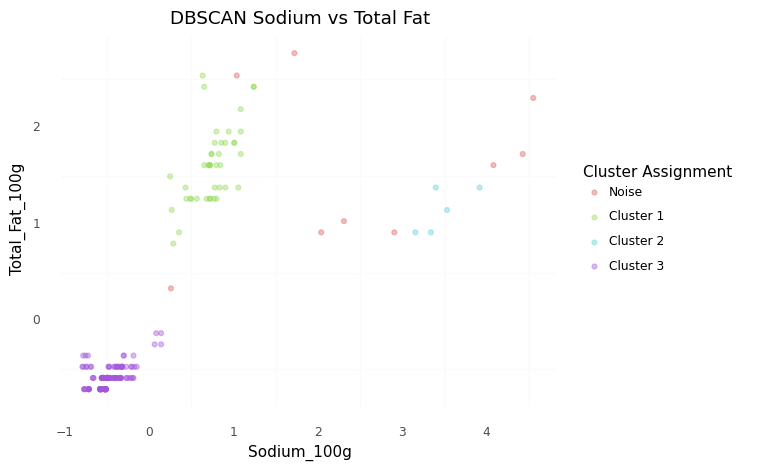

<ggplot: (8743939902973)>

In [108]:
(ggplot(X, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(assignments)")) +
 geom_point(alpha = 0.4) +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN Sodium vs Total Fat"))

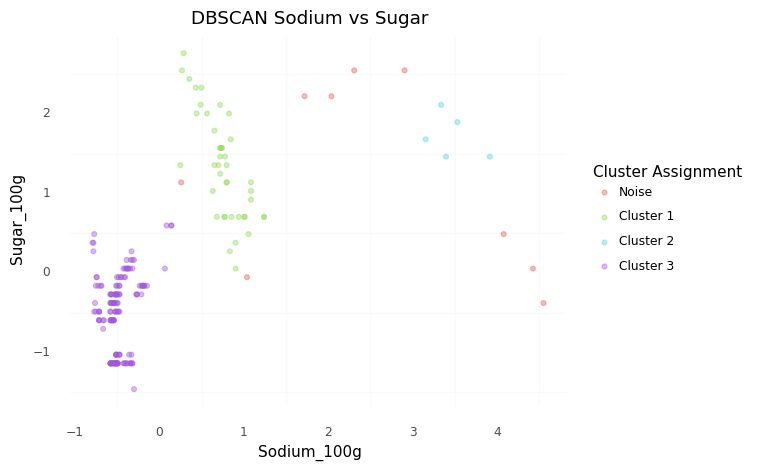

<ggplot: (8743934572849)>

In [105]:
(ggplot(X, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(assignments)")) +
 geom_point(alpha = 0.4) +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN Sodium vs Sugar"))

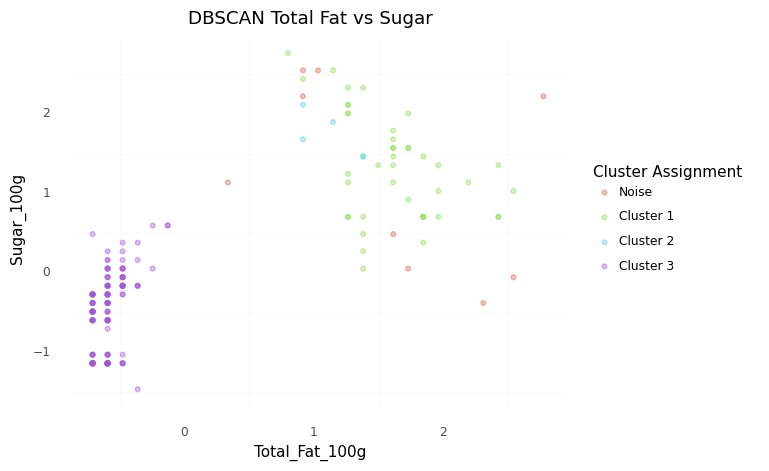

<ggplot: (8743934642937)>

In [106]:
(ggplot(X, aes(x = "Total_Fat_100g", y = "Sugar_100g", color = "factor(assignments)")) +
 geom_point(alpha = 0.4) +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN Total Fat vs Sugar"))

c) I decided the best algorithm would be EM and the worst would be DBSCAN. I chose to find 3 clusters for both algorithms because the graphs appeared to show 3 separate groups of data so it made sense.
For DBSCAN I chose an eps of 0.55 because of the elbow method. From the dark graph above, I picked the y value on the graoh where there is a visble "bend" of the data that looks like an elbow which indicates the optimal value for eps. I chose 3 for min_pts because that was the goldilock value low enough to prevent DBSCAN from combining the two close clusters while also high enough to still recognize the less dense clusters as valid clusters and not noise.

d) BEST: EM 

For the EM model I used a silhouette score to measure performance. It came out with a SS of 0.74. This is a very good score as it is relatively close to the maximum score of 1. You can also see visually in the 3 graphs made that the clusters look right to the human eye. The classification of each data point seems to fall in line with how I imgained the 3 clusters would appear with one generally on the bottom right, one on the middle right, and another towards the top left.

It would appear that cluster 1 would be the "healthiest" donut group having low sodium, fats, and sugar compared to the rest of the donuts. Cluster 2 contains the extremely unhealthy donuts with high fats, sodium, and sugar. Cluster 0 would be the "in-between" donuts that aren't terribly unhealthy because they are low sodium, but are also dense fats and sugar. They have high sugar and fat, but low sodium.

Worst: DBSCAN

For the DBSCAN model I used a silhouette score to measure performance. It came out with a SS of 0.71. This is a pretty good score as it is relatively close to the maximum score of 1. However, it is less than the other model I generated which means it performed worse according to silhoutte scoring. You can also see visually that it clustered similarly to the EM model, with the addition of classifying noise.

It would appear that cluster 3 would be the "healthiest" donut group having low sodium, fats, and sugar compared to the rest of the donuts. Cluster 2 contains the extremely unhealthy donuts with high fats, sodium, and sugar. Cluster 1 would be the "in-between" donuts that aren't terribly unhealthy because they are low sodium, but are also dense fats and sugar. They have high sugar and fat, but low sodium.

In [109]:
# e
featuresChol = ["Sodium_100g", "Total_Fat_100g", "Sugar_100g", "Cholesterol_100g"]
XChol = donuts[featuresChol]

z = StandardScaler()

X[featuresChol] = z.fit_transform(XChol)

EM = GaussianMixture(n_components = 3)

EM.fit(XChol)

cluster = EM.predict(XChol)

print("SILHOUETTE: ", silhouette_score(XChol, cluster))

SILHOUETTE:  0.7927489411817872


e) I decided that adding the extra feature of cholesterol would be a good idea to help cluster the donuts more effectively. This is because of my general knowledge of food nutrition information. I know that cholesterol is an important nutrient that many people look out for and try not to ingest too much of because it is unhealthy. This meant to me that it would be a good indication of what donut is healthy or not depending on how much cholesterol it contains. That would help with these other features to determine how unhealthy each cluster of donuts is. It turns out that it did help the model in clustering the data because the silhouette score improved by a significant amount. It went from 0.74 to 0.79 which is a decent bit closer to the maximum score of 1, indicating an improvement in the model.